In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/IMDbMoviesIndia.csv', encoding='latin1')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
df.shape

(15509, 10)

In [ ]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [ ]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
df=df.dropna(subset=['Name', 'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3','Year','Votes','Duration'])
# ,'Year','Duration','Rating','Votes'

In [ ]:
df.isnull().sum()

Name           0
Year           0
Duration    1900
Genre          0
Rating         1
Votes          0
Director       0
Actor 1        0
Actor 2        0
Actor 3        0
dtype: int64

In [ ]:
df.shape

(7559, 10)

In [ ]:
# Remove 'min' and keep only the numbers
df['Duration'] = df['Duration'].str.replace('min', '').str.strip()

# Convert the column to numeric
df['Duration'] = pd.to_numeric(df['Duration'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7559 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7559 non-null   object 
 1   Year      7559 non-null   object 
 2   Duration  5659 non-null   float64
 3   Genre     7559 non-null   object 
 4   Rating    7558 non-null   float64
 5   Votes     7559 non-null   object 
 6   Director  7559 non-null   object 
 7   Actor 1   7559 non-null   object 
 8   Actor 2   7559 non-null   object 
 9   Actor 3   7559 non-null   object 
dtypes: float64(2), object(8)
memory usage: 649.6+ KB


In [ ]:
median = df['Duration'].median()
df['Duration'].fillna(median, inplace=True)

In [ ]:
median = df['Rating'].median()
df['Rating'].fillna(median, inplace=True)

In [ ]:
df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [ ]:
df.shape

(7559, 10)

In [ ]:
# Assuming 'df' is your DataFrame and 'year_column' is the name of the column containing year data with parentheses
df['Year'] = df['Year'].astype(str).str.replace('(', '').str.replace(')', '')

# Now the parentheses should be removed from the year column
df['Year'] = pd.to_numeric(df['Year'])

# df['Year'] = df['Year'].str.replace(r'[()]', '', regex=True).astype(int)

<ipython-input-36-96e8d0a33bca>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Year'] = df['Year'].astype(str).str.replace('(', '').str.replace(')', '')


In [ ]:
#Name column contains many names with typing errors. So we will take only the alphabets from those names.
df['Name'] = df['Name'].str.extract('([A-Za-z\s\'\-]+)')

In [ ]:
df['Votes'] = pd.to_numeric(df['Votes'].str.replace(',', ''), errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7559 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7550 non-null   object 
 1   Year      7559 non-null   int64  
 2   Duration  7559 non-null   float64
 3   Genre     7559 non-null   object 
 4   Rating    7559 non-null   float64
 5   Votes     7558 non-null   float64
 6   Director  7559 non-null   object 
 7   Actor 1   7559 non-null   object 
 8   Actor 2   7559 non-null   object 
 9   Actor 3   7559 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 649.6+ KB


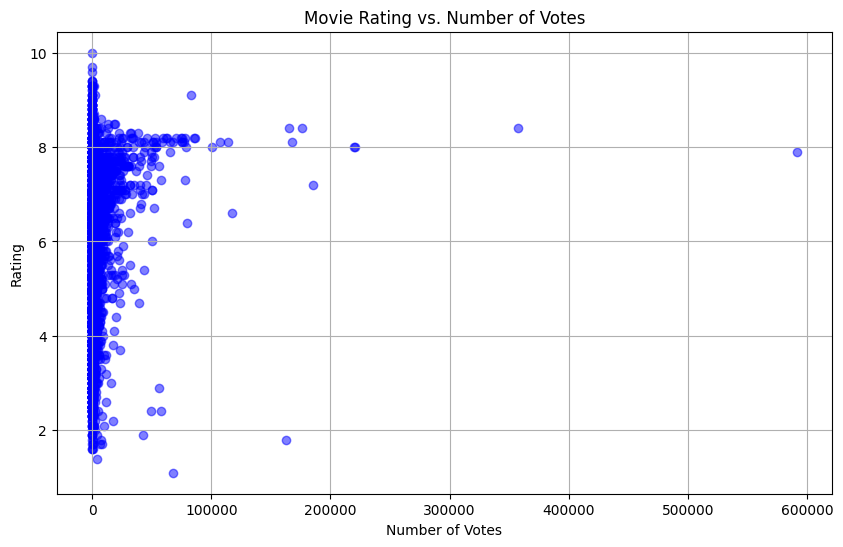

In [ ]:
plt.figure(figsize=(10, 6))

# Create a scatter plot of 'Rating' against 'Votes'
plt.scatter(df['Votes'], df['Rating'], color='blue', alpha=0.5)

# Add labels and title
plt.xlabel('Number of Votes')
plt.ylabel('Rating')
plt.title('Movie Rating vs. Number of Votes')

# Show plot
plt.grid(True)
plt.show()


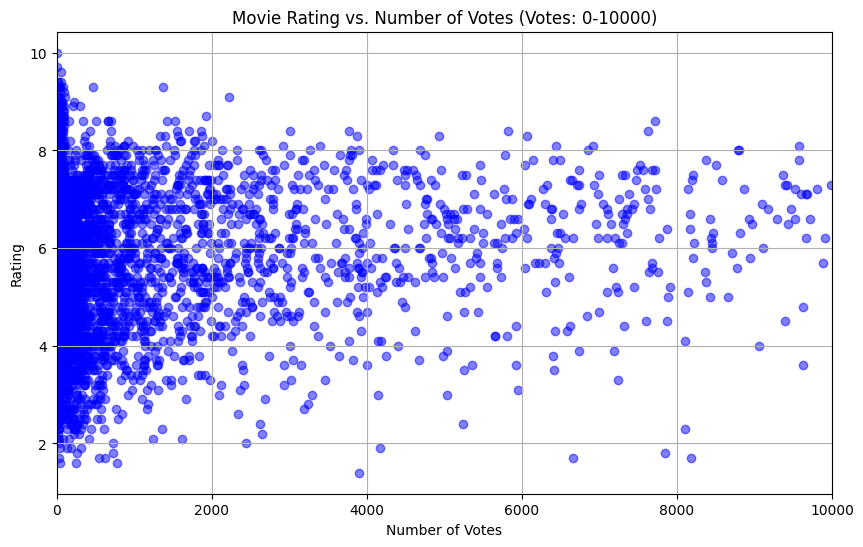

In [ ]:
# Filter the DataFrame to include only rows where the number of votes is between 0 and 10000
df_filtered = df[(df['Votes'] >= 0) & (df['Votes'] <= 10000)]

# Create a scatter plot of 'Rating' against 'Votes' for the filtered DataFrame
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['Votes'], df_filtered['Rating'], color='blue', alpha=0.5)

# Add labels and title
plt.xlabel('Number of Votes')
plt.ylabel('Rating')
plt.title('Movie Rating vs. Number of Votes (Votes: 0-10000)')

# Set x-axis limit to show only votes from 0 to 10000
plt.xlim(0, 10000)

# Show plot
plt.grid(True)
plt.show()


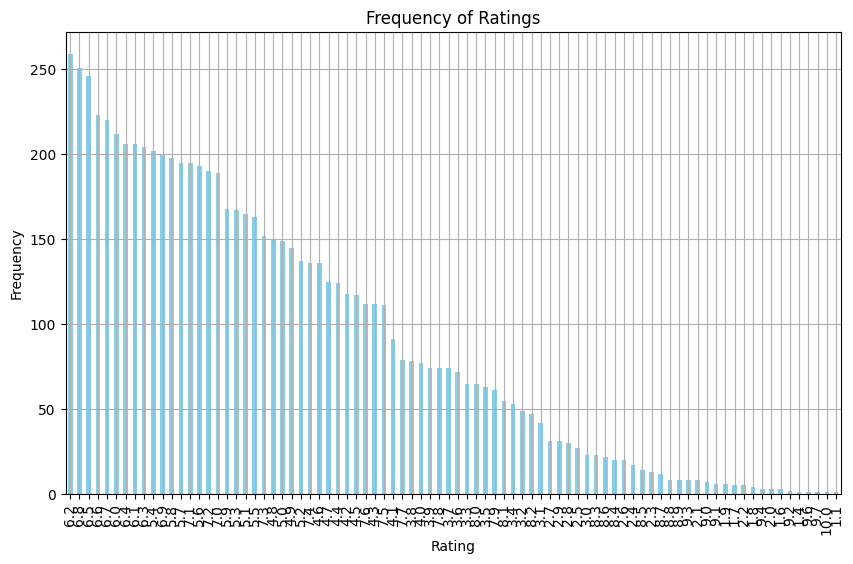

In [ ]:
rating_counts = df['Rating'].value_counts()

plt.figure(figsize=(10, 6))
rating_counts.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Frequency of Ratings')

# Show plot
plt.grid(True)
plt.show()


In [ ]:
actor_avg_rating = pd.melt(df, id_vars=['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director'], value_vars=['Actor 1', 'Actor 2', 'Actor 3'], var_name='Actor_Type', value_name='Actor')

avg = actor_avg_rating.groupby('Actor')['Rating'].mean().reset_index()

<ipython-input-24-ec8e1027d2e3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x='Actor', y='Rating', data=avg, palette='rainbow')


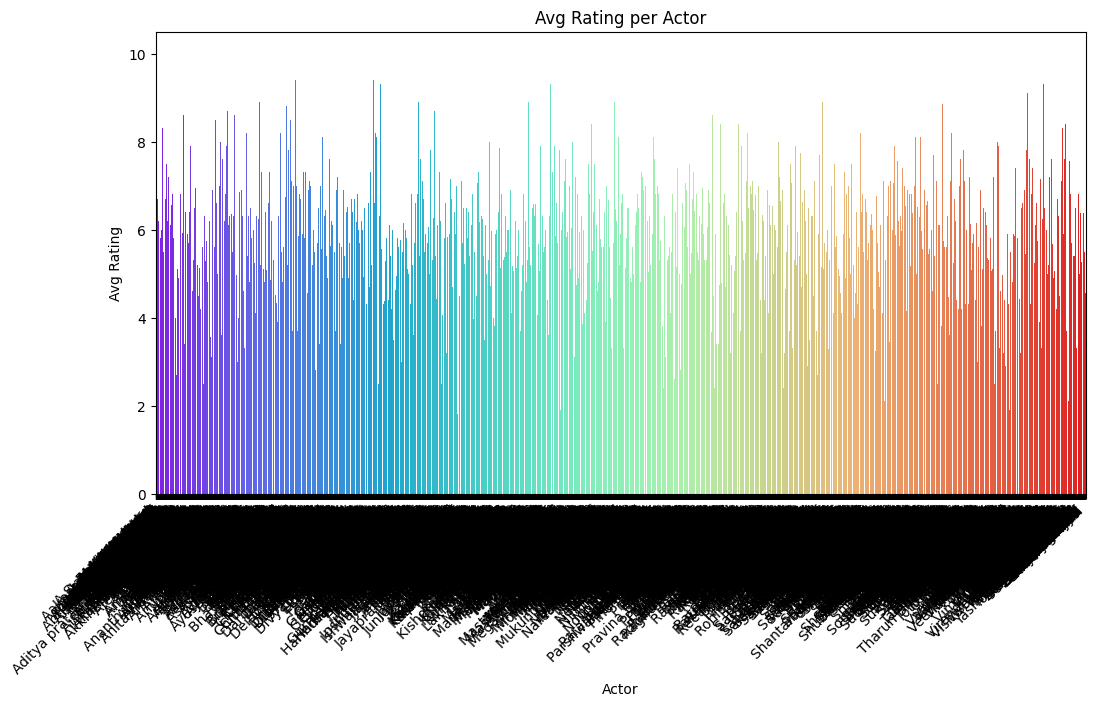

In [ ]:
plt.figure(figsize=(12, 6))
sb.barplot(x='Actor', y='Rating', data=avg, palette='rainbow')
plt.title('Avg Rating per Actor')
plt.xlabel('Actor')
plt.ylabel('Avg Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
avg_rating_director = df.groupby('Director')['Rating'].mean().reset_index()

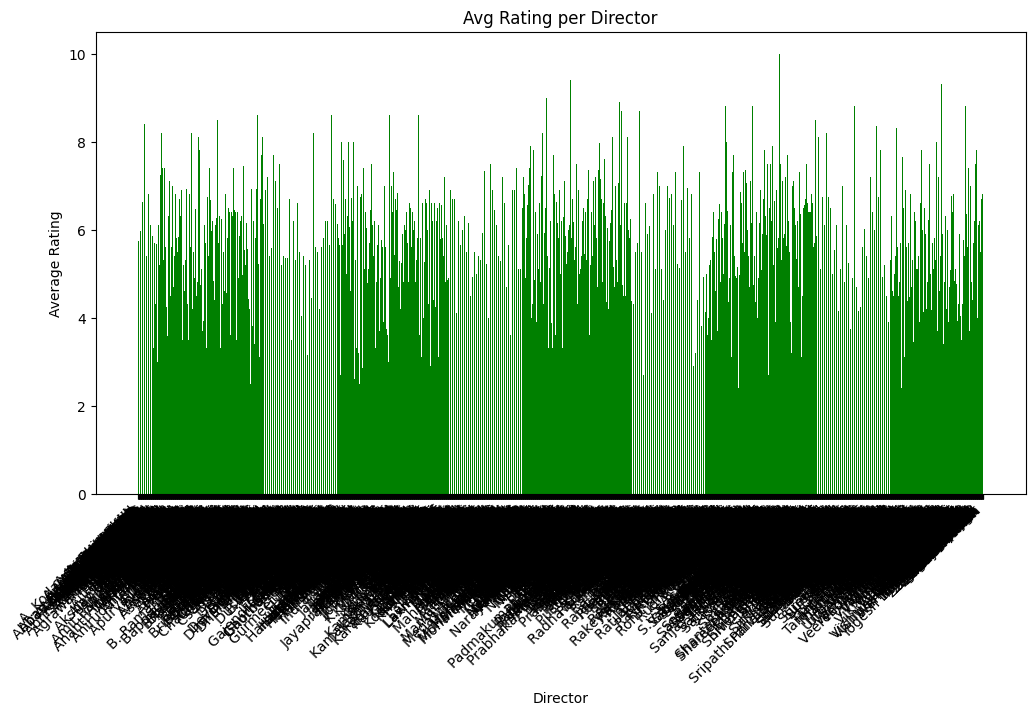

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(avg_rating_director['Director'], avg_rating_director['Rating'], color='green')
plt.title('Avg Rating per Director')
plt.xlabel('Director')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
genre_mean_rating = df.groupby('Genre')['Rating'].transform('mean')
df['Genre_mean_rating'] = genre_mean_rating

director_mean_rating = df.groupby('Director')['Rating'].transform('mean')
df['Director_mean_rating'] = director_mean_rating

actor1_mean_rating = df.groupby('Actor 1')['Rating'].transform('mean')
df['Actor1_mean_rating'] = actor1_mean_rating

actor2_mean_rating = df.groupby('Actor 2')['Rating'].transform('mean')
df['Actor2_mean_rating'] = actor2_mean_rating

actor3_mean_rating = df.groupby('Actor 3')['Rating'].transform('mean')
df['Actor3_mean_rating'] = actor3_mean_rating

In [ ]:
X = df[[ 'Year', 'Votes', 'Duration', 'Genre_mean_rating','Director_mean_rating','Actor1_mean_rating', 'Actor2_mean_rating', 'Actor3_mean_rating']]
y = df['Rating']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
models = {
    'Random Forest Regression': RandomForestRegressor(),
    'Gradient Boosting Regression': GradientBoostingRegressor()
}

results = []
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({'Model': model_name, 'MSE': mse, 'R2': r2})

result_df = pd.DataFrame(results).sort_values(by='MSE')
print("Results:")
print(result_df)

Results:
                          Model       MSE        R2
0      Random Forest Regression  0.330586  0.824682
1  Gradient Boosting Regression  0.348685  0.815084


In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(rf_regressor, param_distributions=param_dist, n_iter=10, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1, random_state=42)

# Fit RandomizedSearchCV to find the best hyperparameters
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

# Use the best model from RandomizedSearchCV
best_rf_model = random_search.best_estimator_

# Predictions
y_pred = best_rf_model.predict(X_test)

# Calculate Mean Squared Error (MSE), R-squared (R2), and Mean Absolute Error (MAE)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)
print("Mean Absolute Error (MAE):", mae)


Best Hyperparameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None}
Mean Squared Error (MSE): 0.3268359656360094
R-squared (R2): 0.826670951426051
Mean Absolute Error (MAE): 0.39564425592159885
